In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
%load_ext rpy2.ipython
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)

/home/xilab/miniconda3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# Integrating Loom File and Meta-data

In [2]:
sample_obs = pd.read_csv("cellID_obs.csv")
umap = pd.read_csv("cell_embeddings.csv")
cell_clusters = pd.read_csv("clusters.csv")

In [3]:
sample = anndata.read_loom("../../../../../Merge-Batch1-and-Batch2-loom-files/Human_merge_Batch1_and_Batch2.loom")
sample

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 63837 × 33538
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [4]:
# Only keep cells from seurat object
sample = sample[np.isin(sample.obs.index,sample_obs["x"])]
sample

View of AnnData object with n_obs × n_vars = 1119 × 33538
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [5]:
# order cells from umap coordinate
sample_index = pd.DataFrame(sample.obs.index)
sample_index = sample_index.rename(columns = {0:'Cell ID'})
umap = umap.rename(columns = {'Unnamed: 0':'Cell ID'})
umap_ordered = sample_index.merge(umap,on="Cell ID")

In [6]:
# Add umap coordinate to Anndata object
umap_ordered = umap_ordered.iloc[:,1:]
sample.obsm['X_umap'] = umap_ordered.values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
# reorder cell_cluster
cell_clusters = cell_clusters.rename(columns = {'cells':'Cell ID'})
clusters_ordered = sample_index.merge(cell_clusters,on="Cell ID")

In [8]:
clusters_ordered 

,Cell ID,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,UMI.Non.mt,old_RNA_snn_res.0.5,seurat_clusters,old_RNA_snn_res.0.2,...,old.ident,old_RNA_snn_res.1.6,RNA_snn_res.0.2,RNA_snn_res.0.4,RNA_snn_res.0.6,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.6
0,PH3-CD326:TATTGGGCATACTGACx,TATTGGGCATACTGAC_1,PH3-CD326,19646,4617,9.661000,17748.0,8.0,11,4,...,4,8,0,7,8,9,10,10,11,11
1,PH3-CD326:TCTACCGCAACCGTGCx,TCTACCGCAACCGTGC_1,PH3-CD326,10485,3205,13.781593,9040.0,8.0,0,4,...,4,9,1,1,0,0,0,0,0,0
2,PH3-mesen:AATTTCCTCTGAGGTTx,AATTTCCTCTGAGGTT_5,PH3-mesen,35206,6428,6.490371,NaN,5.0,0,4,...,4,9,1,1,0,0,0,0,0,0
3,PH3-mesen:AAAGGTATCCAAGCCGx,AAAGGTATCCAAGCCG_5,PH3-mesen,13030,3784,7.536454,NaN,5.0,1,4,...,4,9,1,4,3,3,3,2,1,1
4,PH3-mesen:AAGCCATAGCGTTCATx,AAGCCATAGCGTTCAT_5,PH3-mesen,23235,5408,6.025393,NaN,6.0,2,4,...,4,8,2,3,2,2,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,PH4-mesen:TTCCGGTAGTCACTCAx,TTCCGGTAGTCACTCA_6,PH4-mesen,10591,3414,8.497781,NaN,5.0,0,4,...,4,9,1,1,0,0,0,0,0,0
1115,PH4-mesen:TTATTGCGTAGGTGCAx,TTATTGCGTAGGTGCA_6,PH4-mesen,11389,3831,6.655545,NaN,5.0,10,4,...,4,29,3,2,9,8,9,9,10,10
1116,PH4-mesen:TTATTGCGTGCCTAATx,TTATTGCGTGCCTAAT_6,PH4-mesen,10871,3216,9.244780,NaN,5.0,0,4,...,4,9,1,1,0,0,0,0,0,0
1117,PH4-mesen:TTCCTTCAGTCATCGTx,TTCCTTCAGTCATCGT_6,PH4-mesen,40592,6703,5.247339,NaN,5.0,8,4,...,4,8,1,5,10,10,8,8,8,8


In [9]:
# Add cluster info to Anndata object
clusters_ordered = clusters_ordered.iloc[:,8]
sample.obs['clusters'] = np.array(clusters_ordered)

# Running RNA Velocity

In [10]:
sample.obs['clusters'] = sample.obs['clusters'].astype('category').values

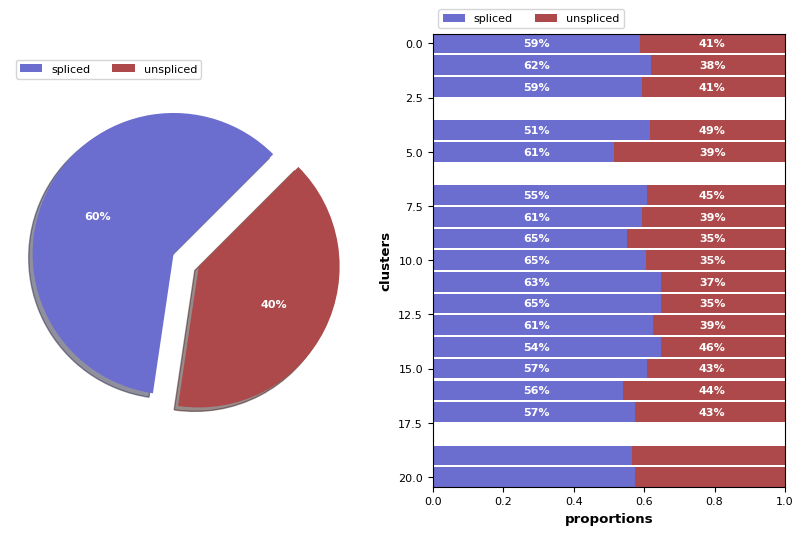

In [11]:
scv.pl.proportions(sample,figsize=(10,6))

In [12]:
scv.pp.filter_and_normalize(sample, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(sample, n_pcs=30, n_neighbors=30)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 25663 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [13]:
scv.tl.velocity(sample)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [14]:
scv.tl.velocity_graph(sample)

computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


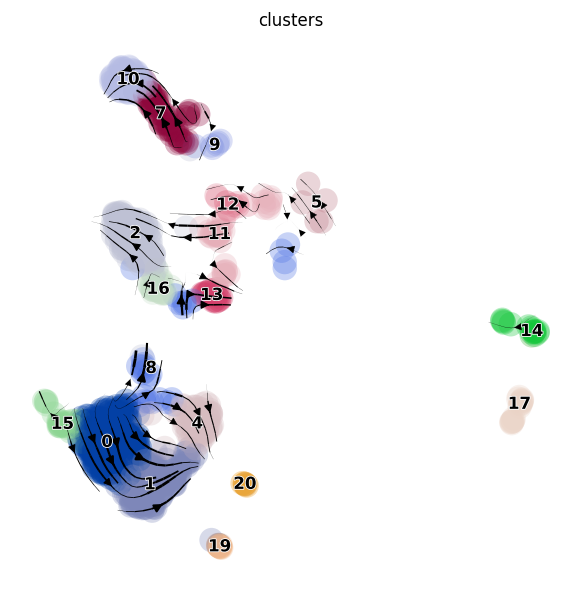

In [15]:
scv.pl.velocity_embedding_stream(sample, basis='umap',dpi = 120)

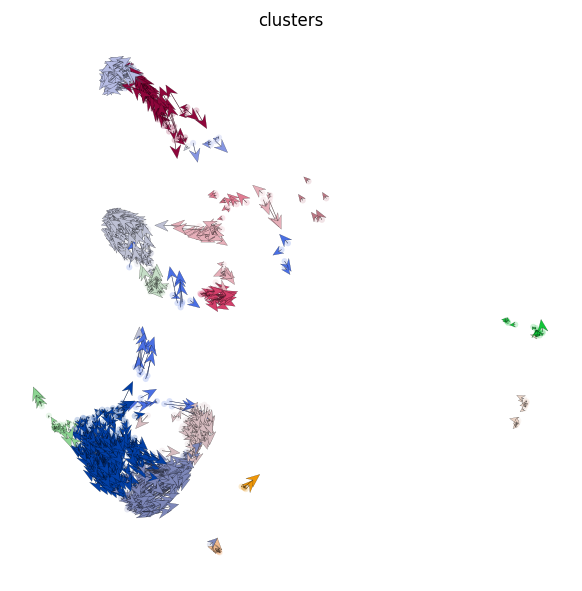

In [16]:
scv.pl.velocity_embedding(sample, arrow_length=5, arrow_size=4, dpi=120)

# Identify important genes

In [17]:
scv.tl.rank_velocity_genes(sample, groupby='clusters', min_corr=.3)

df = scv.DataFrame(sample.uns['rank_velocity_genes']['names'])
df.head(20)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,4,5,7,8,9,10,11,12,13,14,15,16,17,19,20
0,TGFBR2,MICAL2,CD36,PMP22,IGHA2,THSD4,CACHD1,DEPTOR,TC2N,SEMA3F,DSP,NCAM1,MCAM,MYO5C,CLIC5,EMID1,DST,ELOVL7
1,THRB,IL18R1,ABCB1,SLC4A7,BCL2,ELN,PITPNM2,APBB2,NLGN1,SEC14L1,APLNR,CDC42BPA,ZFHX3,BCAT1,TBCD,PDE3B,HAS2,NAV1
2,DAAM1,ICAM1,IQCK,ZNF385D,NOX4,HTR4,RIN3,NAV1,USP53,LAMB1,ITGA6,PCDH17,INPP4B,TLL1,ATOH8,CLMN,ANGPTL1,MIRLET7BHG
3,TGFBR3,ARHGEF15,KIAA1671,AKAP12,IGHA1,SOX5,EMCN,PLCL2,GCNT1,GALNT18,ACTG1,RAPGEF5,TMEM131L,TSPAN18,AIF1L,P3H4,EGLN3,NEURL1B
4,ARID5B,FAM20A,RAB34,JAM3,ZNF704,MAP3K1,NAV1,FAP,FRMD4B,FJX1,MYH11,HIPK2,EPS8,DAGLB,CD58,INPP4B,BCL2,CD44
5,ANXA1,LPP,ABCC4,LIMK2,ITIH5,GRB14,C3orf70,AQP7,PDE4B,ADGRL4,BCAT1,COL6A2,CLMN,NEURL1B,PRTG,COL5A2,DMD,PITPNM2
6,SRGN,FAM208B,NCALD,PIK3R1,DEPTOR,NKAIN2,PLAT,PIK3R3,RAPGEF2,PLA1A,FGD6,MYO1E,ATP8B2,HIP1,CMTM8,ZNF618,MX2,ADGRF5
7,PDLIM3,METRNL,AHRR,RAB27A,EFCC1,LTBP1,DEPTOR,TMEM150C,ADAMTS1,MYO1B,PLK2,AGMO,EMID1,ATP2B1,ADARB1,PMP22,MLKL,CX3CL1
8,DOCK11,AHI1,CLASP1,PPFIBP1,NLGN4Y,PRDM16,TNFSF10,BTNL9,SLC37A1,XAF1,PLXND1,ADGRF5,ADGRL3,STARD8,FGF12,C1orf21,C3orf70,IGHA1
9,HGF,KLF7,FZD4,TSHZ2,MGLL,PLCG2,ADCY4,CAMK2G,GATA6,PREX1,SNCA,MT1M,ITIH5,SYN2,KCNQ1,WNT5B,TTLL7,BTNL9


In [18]:
kwargs = dict(frameon=False, size=10, linewidth=1.5,
              add_outline='3, 0')

scv.pl.scatter(sample, df['3'][:5], ylabel='cluster-3', **kwargs)
scv.pl.scatter(sample, df['0'][:5], ylabel='cluster-0', **kwargs)

KeyError: '3'

# Velocities in cycling progenitors

In [ ]:
# Attention, the default genes probably are from Human.
scv.tl.score_genes_cell_cycle(sample)
scv.pl.scatter(sample, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [ ]:
s_genes, g2m_genes = scv.utils.get_phase_marker_genes(sample)
s_genes = scv.get_df(sample[:, s_genes], 'spearmans_score', sort_values=True).index
g2m_genes = scv.get_df(sample[:, g2m_genes], 'spearmans_score', sort_values=True).index

kwargs = dict(frameon=False, ylabel='cell cycle genes')
scv.pl.scatter(sample, list(s_genes[:2]) + list(g2m_genes[:3]), **kwargs)

# Speed and coherence

In [ ]:
scv.tl.velocity_confidence(sample)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(sample, c=keys, cmap='coolwarm', perc=[5, 95])

In [ ]:
df = sample.obs.groupby('clusters')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

# Velocity graph and pseudotime

In [ ]:
scv.pl.velocity_graph(sample, threshold=.1)

In [ ]:
# how to set the starting_cell ?
x, y = scv.utils.get_cell_transitions(sample, basis='umap', starting_cell=0)
ax = scv.pl.velocity_graph(sample, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(sample, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

In [ ]:
scv.tl.velocity_pseudotime(sample)
scv.pl.scatter(sample, color='velocity_pseudotime', cmap='gnuplot')

# PAGA velocity graph

In [ ]:
# PAGA requires to install igraph, if not done yet.
!pip install python-igraph --upgrade --quiet

In [ ]:
# this is needed due to a current bug - bugfix is coming soon.
sample.uns['neighbors']['distances'] = sample.obsp['distances']
sample.uns['neighbors']['connectivities'] = sample.obsp['connectivities']

scv.tl.paga(sample, groups='clusters')
df = scv.get_df(sample, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [ ]:
scv.pl.paga(sample, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [ ]:
scv.pl.paga(sample, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, threshold = 0.025)

In [ ]:
scv.pl.paga(sample, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, threshold = 0.05)